In [35]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, plot_roc_curve, roc_curve, recall_score, precision_score, precision_recall_curve, auc, roc_auc_score, f1_score

In [2]:
wine = pd.read_csv('white_wine.csv')

In [3]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


In [4]:
wine['alcohol'].fillna(wine['alcohol'].mean(), inplace=True)
wine['label'] = np.where(wine['quality']>6, 1, 0)
wine['label'].value_counts(normalize=True)*100

0    81.153846
1    18.846154
Name: label, dtype: float64

We will be doing some EDA to check the target variabel distribution. The target variabel distribution is
1. (+) a good quality wine : quality > 6 (18.9%)
1. (-) a bad quality wine : quality <= 6 (81.1%)

You will find that the distribution is imbalanced with 18.9 % positive class and 81.1 % negative class. The minority class is the good quality one, we migh more interest to detect a wine with good quality than the common one.

Text(0, 0.5, 'Density')

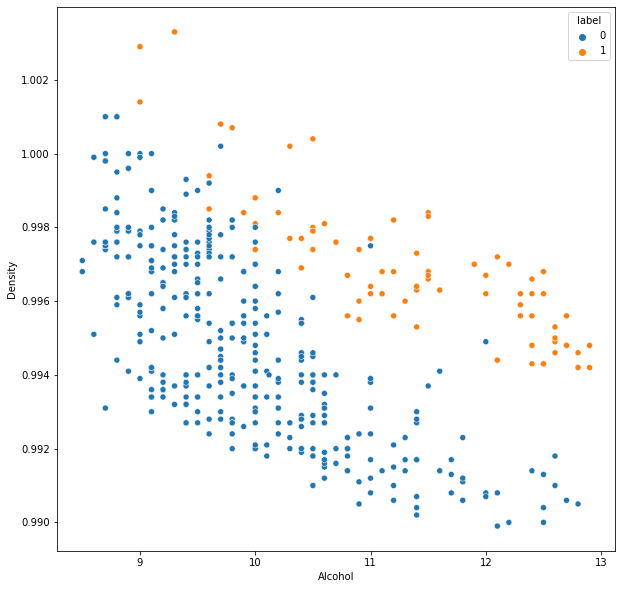

In [5]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'alcohol', y = 'density', data=wine, hue='label')
plt.xlabel('Alcohol')
plt.ylabel('Density')

In [6]:
X = wine[['density', 'alcohol']]
y = wine['label']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2020)

## Model 1: w/o Polynomial

In [8]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred = logit.predict(X_test)
print('performance \n', classification_report(y_test, y_pred))

performance 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       106
           1       0.69      0.38      0.49        24

    accuracy                           0.85       130
   macro avg       0.78      0.67      0.70       130
weighted avg       0.84      0.85      0.84       130



From illustration abovel, you can see the performance of the machine learning model. Let's say our concern is to these three metrics:
1. precision (+) : 0.69
1. recall (+) : 0.38
1. f1-score (+) : 0.49

<br>
next, we will do the modeling process with adding polynomial features and see the changes.

## Model 2: w/ Polynomial

In [10]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X_train)
Xtr_poly = poly.transform(X_train)
Xts_poly = poly.transform(X_test)

In [11]:
logit = LogisticRegression()
logit.fit(Xtr_poly, y_train)

C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [12]:
y_pred = logit.predict(Xts_poly)
print('performance \n', classification_report(y_test, y_pred))

performance 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       106
           1       0.95      0.88      0.91        24

    accuracy                           0.97       130
   macro avg       0.96      0.93      0.95       130
weighted avg       0.97      0.97      0.97       130



From illustration abovel, you can see the performance improvement of the machine learning model. The changes of the three metrics:
1. precision (+) : from 0.69 to 0.95
1. recall (+) : from 0.38 to 0.88
1. f1-score (+) : from 0.49 to 0.91

> # Resampling Method : Non Performing Loan

In [13]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [15]:
bankloan = pd.read_csv('bankloan.csv')

In [18]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [19]:
X = bankloan[fitur]
y = bankloan[target]

> ## EDA

In [21]:
bankloan['default'].value_counts(normalize=True)*100

0    73.857143
1    26.142857
Name: default, dtype: float64

> ## Data Splitting

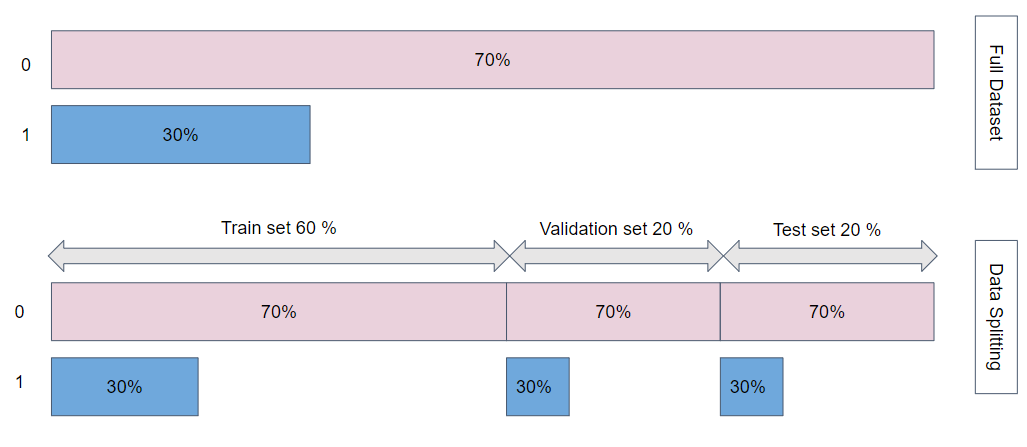

In [26]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=1899)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.2, random_state=1899)

In the modeling process we will try some method and choose the best method based on f1 score. Those methods are :
1. logistic regression without any treatment
1. logistic regression that otimized by the threshold
1. logistic regression with random undersampling
1. Penalized logistic regression

> ## No Treatment

scenario :
1. metrics : f1-score
1. benchmark
1. threshold optimization

In [48]:
logit = LogisticRegression()
logit.fit(X_train_val, y_train_val)

C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [49]:
y_pred = logit.predict(X_test)
prob1 = logit.predict_proba(X_test)[:,1]

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       103
           1       0.68      0.41      0.51        37

    accuracy                           0.79       140
   macro avg       0.75      0.67      0.69       140
weighted avg       0.78      0.79      0.77       140



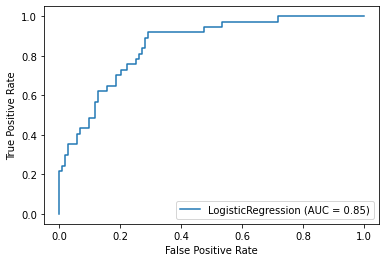

In [33]:
plot_roc_curve(logit, X_test, y_test)

In [50]:
fpr, tpr, threshold = roc_curve(y_test, prob1)

In [36]:
logit.fit(X_train, y_train)

thr_value = [i/100 for i in range(20, 60)]
score = 0
score_list = []

for i in thr_value:
    y_prob = logit.predict_proba(X_val)[:,1]
    y_pred = np.where(y_prob>i,1,0)
    score_temp = f1_score(y_val, y_pred)
    score_list.append(score_temp)
    
    if score_temp > score:
        score = score_temp
        
        best_score = score
        best_thr = i

C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

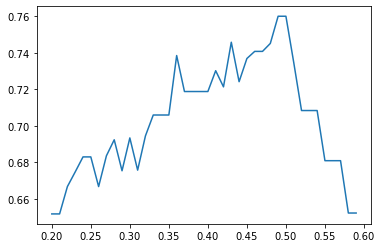

In [37]:
sns.lineplot(thr_value, score_list)

In [38]:
print('best threshold', best_thr)
print('best score', best_score)

best threshold 0.49
best score 0.7599999999999999


In [46]:
logit.fit(X_train_val, y_train_val)
y_prob = logit.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob>best_thr, 1, 0)

C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       103
           1       0.67      0.43      0.52        37

    accuracy                           0.79       140
   macro avg       0.74      0.68      0.70       140
weighted avg       0.78      0.79      0.78       140



> ## Resampling: Undersampling

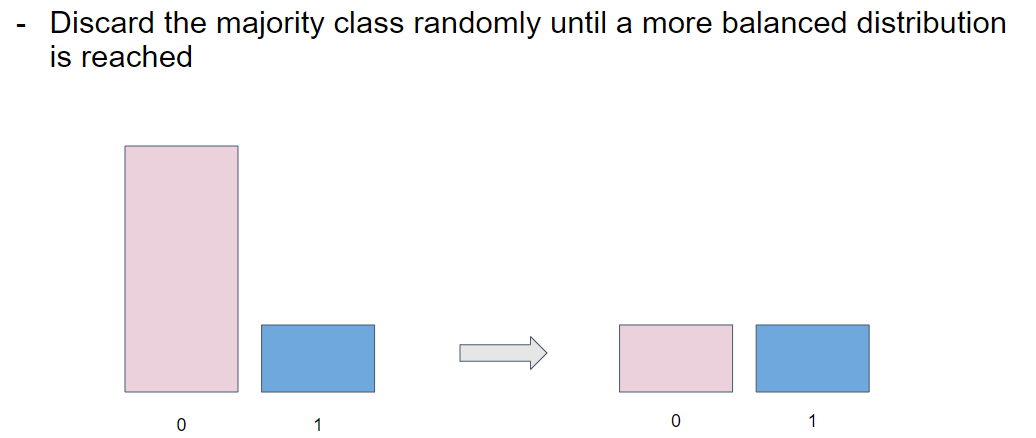

In [51]:
rus = RandomUnderSampler()
X_under, y_under = rus.fit_resample(X_train_val, y_train_val) # undersampling the training set

In [53]:
y_train_val['default'].value_counts()

0    414
1    146
Name: default, dtype: int64

In [54]:
y_under['default'].value_counts()

1    146
0    146
Name: default, dtype: int64

In [55]:
logit_under = LogisticRegression()
logit_under.fit(X_under, y_under)
y_pred = logit_under.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80       103
           1       0.52      0.92      0.66        37

    accuracy                           0.75       140
   macro avg       0.74      0.80      0.73       140
weighted avg       0.84      0.75      0.76       140



C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


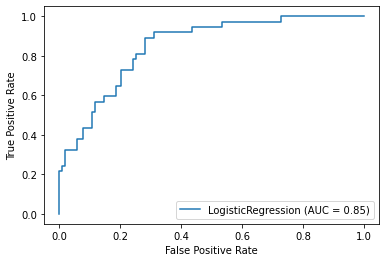

In [56]:
plot_roc_curve(logit_under, X_test, y_test)

In [58]:
smote = SMOTE()
X_smo, y_smo = smote.fit_resample(X_train_val, y_train_val)
logit_smo = LogisticRegression().fit(X_smo, y_smo)
y_pred = logit_smo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81       103
           1       0.52      0.84      0.64        37

    accuracy                           0.75       140
   macro avg       0.72      0.78      0.72       140
weighted avg       0.82      0.75      0.76       140



C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [59]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train_val, y_train_val)
logit_ros = LogisticRegression().fit(X_ros, y_ros)
y_pred = logit_ros.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.71      0.82       103
           1       0.53      0.92      0.67        37

    accuracy                           0.76       140
   macro avg       0.75      0.81      0.74       140
weighted avg       0.85      0.76      0.78       140



C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [68]:
ros_df = pd.concat([X_ros, y_ros], axis=1)
smo_df = pd.concat([X_smo, y_smo], axis=1)
under_df = pd.concat([X_under, y_under], axis=1)
df = pd.concat([X_train_val,y_train_val], axis=1)

<AxesSubplot:xlabel='debtinc', ylabel='creddebt'>

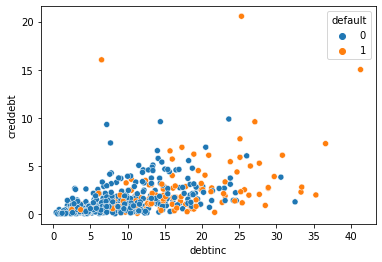

In [66]:
sns.scatterplot(x='debtinc', y='creddebt', data=df, hue='default')

<AxesSubplot:xlabel='debtinc', ylabel='creddebt'>

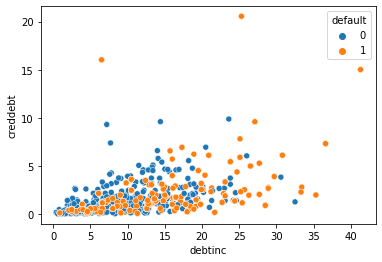

In [62]:
sns.scatterplot(x='debtinc', y='creddebt', data=ros_df, hue='default')

<AxesSubplot:xlabel='debtinc', ylabel='creddebt'>

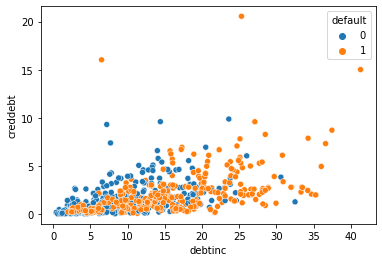

In [67]:
sns.scatterplot(x='debtinc', y='creddebt', data=smo_df, hue='default')

<AxesSubplot:xlabel='debtinc', ylabel='creddebt'>

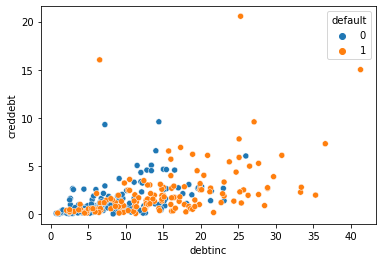

In [69]:
sns.scatterplot(x='debtinc', y='creddebt', data=under_df, hue='default')

> ## Penalized

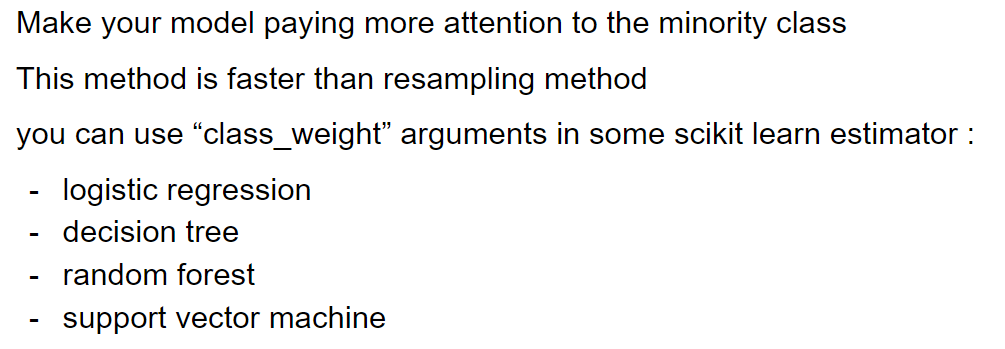

In [70]:
logit_balance = LogisticRegression(class_weight = 'balanced')
logit_balance.fit(X_train_val, y_train_val)
y_pred = logit_balance.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82       103
           1       0.53      0.89      0.67        37

    accuracy                           0.76       140
   macro avg       0.74      0.81      0.74       140
weighted avg       0.84      0.76      0.78       140



C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


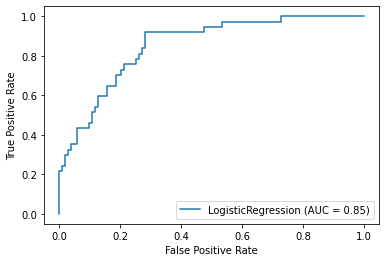

In [71]:
plot_roc_curve(logit_balance, X_test, y_test)

> ## Summary

In [72]:
f1_no_treat = f1_score(y_test, logit.predict(X_test))

y_prob1 = logit.predict_proba(X_test)[:,1]
f1_no_treat_thr = f1_score(y_test, np.where(y_prob1>best_thr,1,0))

f1_under = f1_score(y_test, logit_under.predict(X_test))
f1_ros = f1_score(y_test, logit_ros.predict(X_test))
f1_smo = f1_score(y_test, logit_smo.predict(X_test))

f1_balance = f1_score(y_test, logit_balance.predict(X_test))

In [73]:
score_list = [f1_no_treat, f1_no_treat_thr, f1_under, f1_ros, f1_smo, f1_balance]
model_name = 'default threshold_opt undersampling oversampling smote weight_balance'.split()

df_summary = pd.DataFrame({'method': model_name, 'score': score_list})
df_summary

,method,score
0,default,0.508475
1,threshold_opt,0.524590
2,undersampling,0.660194
3,oversampling,0.673267
4,smote,0.639175
5,weight_balance,0.666667


From this summary you can see that we tried several methods to handle imbalance classification problem.

> # Combine Cross Validation with Balancing Method

In [74]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, f1_score

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [75]:
X, y

(     employ  debtinc   creddebt   othdebt
 0        17      9.3  11.359392  5.008608
 1        10     17.3   1.362202  4.000798
 2        15      5.5   0.856075  2.168925
 3        15      2.9   2.658720  0.821280
 4         2     17.3   1.787436  3.056564
 ..      ...      ...        ...       ...
 695       6      4.6   0.262062  0.979938
 696       6     11.5   0.369495  2.045505
 697      15      7.6   0.491264  1.940736
 698      19      8.4   2.302608  4.165392
 699      12     14.7   2.994684  3.473316
 
 [700 rows x 4 columns],
      default
 0          1
 1          0
 2          0
 3          0
 4          1
 ..       ...
 695        1
 696        0
 697        0
 698        0
 699        0
 
 [700 rows x 1 columns])

> ## Resampling : SMOTE

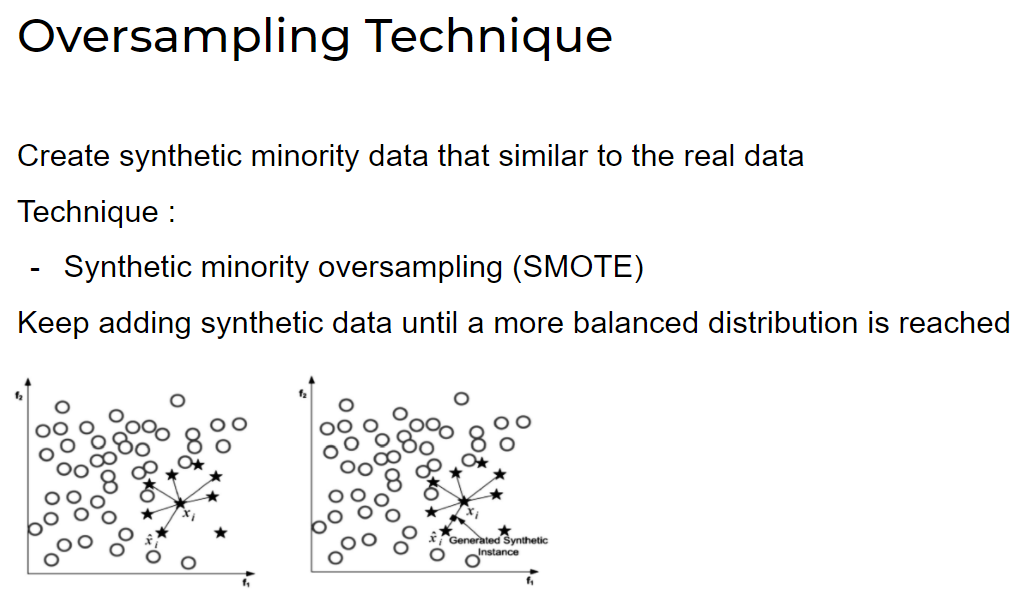

When you want to combine cross validation and any resampling method it's very recommended for you to use Pipeline because it simplyfy your code and make sure that validation set and test set is not involved in the modeling. Using pipline will also work on hyperparameter tuning.

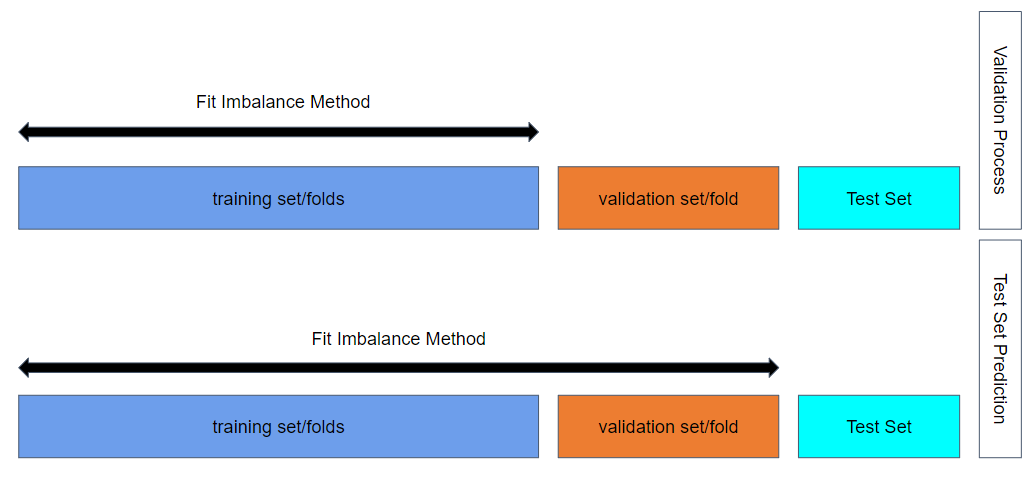

In [76]:
smote = SMOTE()
logit = LogisticRegression()

estimator = Pipeline([('balancing', smote), ('clf', logit)])

In [77]:
skf = StratifiedKFold(n_splits = 5)
model_cv = cross_val_score(estimator, X_train_val, y_train_val, cv = skf, scoring = 'f1')

In [78]:
print('cv score:', model_cv)
print('cv score mean:', model_cv.mean())

cv score: [0.56097561 0.61333333 0.62686567 0.74193548 0.52173913]
cv score mean: 0.6129698458073946


> ## Penalized

In [79]:
logit_balance = LogisticRegression(class_weight='balanced')
model_cv_balance = cross_val_score(logit_balance, X_train_val, y_train_val, cv=skf, scoring='f1')

In [80]:
print('cv score:', model_cv_balance)
print('cv score mean:', model_cv_balance.mean())

cv score: [0.56097561 0.60273973 0.60869565 0.76190476 0.52173913]
cv score mean: 0.6112109760593905


# Combine Hyperparameter Tuning with Balancing Method

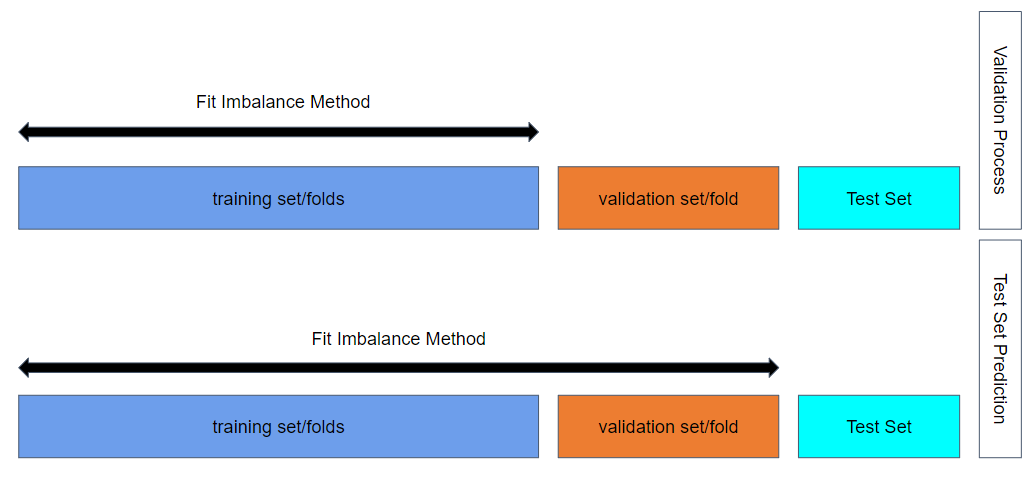

In [82]:
smote = SMOTE()
model = LogisticRegression()
estimator = Pipeline([('balancing', smote), ('clf', model)])

hyperparam_space = {
    'balancing__k_neighbors': [2,5,10,15,20],
    'clf__C':[100, 10, 1, 0.1, 0.01, 0.001],
    'clf__solver':['liblinear', 'newton-cg']
}

skf = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(estimator,
                           param_grid = hyperparam_space,
                          cv = skf,
                          scoring = 'f1',
                          n_jobs = -1
                          )

In [86]:
5*6*2

60

In [83]:
grid_search.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('balancing', SMOTE()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'balancing__k_neighbors': [2, 5, 10, 15, 20],
                         'clf__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'clf__solver': ['liblinear', 'newton-cg']},
             scoring='f1')

In [84]:
print('best score:', grid_search.best_score_)
print('best param:', grid_search.best_params_)

best score: 0.6220609066411373
best param: {'balancing__k_neighbors': 5, 'clf__C': 10, 'clf__solver': 'newton-cg'}


In [85]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_balancing__k_neighbors,param_clf__C,param_clf__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.069414,0.009743,0.009972,0.003155,2,100,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 100, '...",0.550000,0.594595,0.636364,0.750000,0.529412,0.612074,0.078237,21
1,0.119280,0.013683,0.009774,0.004861,2,100,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 100, '...",0.543210,0.602740,0.646154,0.741935,0.521739,0.611156,0.078754,23
2,0.040492,0.006724,0.009574,0.004991,2,10,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 10, 'c...",0.536585,0.591549,0.617647,0.738462,0.542857,0.605420,0.073067,44
3,0.067020,0.010275,0.010174,0.004388,2,10,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 10, 'c...",0.536585,0.619718,0.617647,0.761905,0.535211,0.614213,0.082610,13
4,0.046874,0.028229,0.007580,0.002720,2,1,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 1, 'cl...",0.543210,0.594595,0.617647,0.730159,0.542857,0.605693,0.068717,43
5,0.063829,0.011353,0.008577,0.003373,2,1,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 1, 'cl...",0.567901,0.591549,0.636364,0.761905,0.521739,0.615892,0.081853,9
6,0.046491,0.020922,0.011554,0.008175,2,0.1,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 0.1, '...",0.543210,0.594595,0.626866,0.761905,0.555556,0.616426,0.078505,7
7,0.069815,0.017942,0.010172,0.003643,2,0.1,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 0.1, '...",0.536585,0.591549,0.617647,0.750000,0.521739,0.603504,0.081201,49
8,0.046874,0.015870,0.009975,0.005850,2,0.01,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 0.01, ...",0.554217,0.615385,0.591549,0.716418,0.602740,0.616062,0.054176,8
9,0.074402,0.014127,0.009575,0.002718,2,0.01,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 0.01, ...",0.536585,0.611111,0.608696,0.750000,0.563380,0.613954,0.073604,14


> ## Model Performance Before Tuning

In [88]:
smote = SMOTE()
logit = LogisticRegression()

estimator = Pipeline([('balancing', smote), ('clf', model)])

estimator.fit(X_train_val, y_train_val)
y_pred_default = estimator.predict(X_test)

print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.94      0.72      0.81       103
           1       0.52      0.86      0.65        37

    accuracy                           0.76       140
   macro avg       0.73      0.79      0.73       140
weighted avg       0.83      0.76      0.77       140



> ## Model Performance After Tuning

In [89]:
estimator_tuned = grid_search.best_estimator_.fit(X_train_val, y_train_val)
y_pred_tuned = estimator_tuned.predict(X_test)

In [90]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83       103
           1       0.54      0.86      0.67        37

    accuracy                           0.77       140
   macro avg       0.74      0.80      0.75       140
weighted avg       0.83      0.77      0.78       140



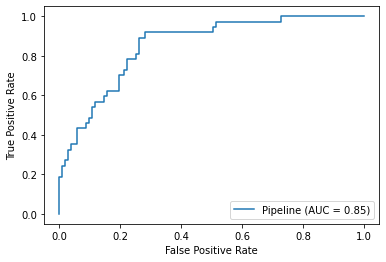

In [91]:
plot_roc_curve(estimator_tuned, X_test, y_test)

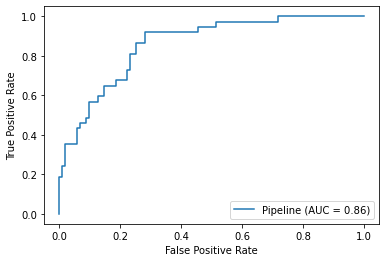

In [92]:
plot_roc_curve(estimator, X_test, y_test)